# ENGR 421 - Homework 2
## Harun Sasmaz
### 59900

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

### Importing Data

In [3]:
data_set = pd.read_csv("hw02_data_set_images.csv", delimiter=',', header=None).to_numpy()
labels = pd.read_csv("hw02_data_set_labels.csv", delimiter=',', header=None).to_numpy().reshape(195,)

x_train = np.concatenate((data_set[:25], data_set[39:64], data_set[78:103]))
x_train = np.concatenate((x_train, data_set[117:142], data_set[156:181]))
x_test = np.concatenate((data_set[25:39], data_set[64:78], data_set[103:117]))
x_test = np.concatenate((x_test, data_set[142:156], data_set[181:195]))

y_train_char = np.concatenate((labels[:25], labels[39:64], labels[78:103]))
y_train_char = np.concatenate((y_train_char, labels[117:142], labels[156:181]))
y_test_char = np.concatenate((labels[25:39], labels[64:78], labels[103:117]))
y_test_char = np.concatenate((y_test_char, labels[142:156], labels[181:195]))

y_train = np.array([ord(char) - 64 for char in y_train_char]).astype(int)
y_test = np.array([ord(char) - 64 for char in y_test_char]).astype(int)

### Learning Parameters and Y_truth

In [4]:
K = 5
N = x_train.shape[0]

eta = 0.001
epsilon = 1e-3

y_truth = np.zeros((N, K)).astype(int)
y_truth[range(N), y_train - 1] = 1

### Discrimination Functions and Parameters

In [5]:
def sigmoid(X, W, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, W) + w0))))

def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([-np.sum(np.repeat((Y_truth[:,c] - Y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))


W = np.random.uniform(low = -0.01, high = 0.01, size = (x_train.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

### Linear Discrimination Iteration

In [6]:
iteration = 1
objective_values = []

while 1:
    y_predicted = sigmoid(x_train, W, w0)
    objective_values = np.append(objective_values, np.sum(0.5*(y_truth - y_predicted)**2))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(x_train, y_truth, y_predicted)
    w0 = w0 - eta * gradient_w0(y_truth, y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1

### Objective Values Convergence Graph

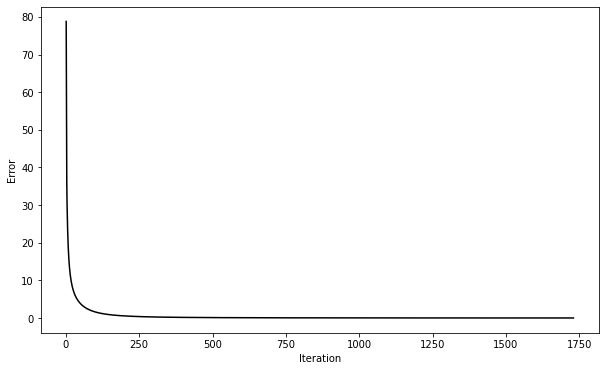

In [7]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

### Confusion Matrix for Train Data

In [8]:
y_pred = np.argmax(y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_pred, y_train, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


### Confusion Matrix for Test Data

In [9]:
N = x_test.shape[0]
y_test_pred = np.argmax(sigmoid(x_test, W, w0), axis = 1) + 1
confusion_matrix = pd.crosstab(y_test_pred, y_test, rownames = ['y_pred'], colnames = ['y_test'])
print(confusion_matrix)

y_test   1   2   3   4   5
y_pred                    
1       13   1   0   0   0
2        1  11   0   0   2
3        0   0  14   0   0
4        0   0   0  14   0
5        0   2   0   0  12
